In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('/app/my_data/students_diplomado_data_science_fmat/class_of_2024/Natasha_Baeza/gapminder_data_world_health.csv')

In [20]:
dataset.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

## Ejercicio 1

### Ejercico 1.1 

Elabora una gráfica de distribución usando un ejemplo de data to viz

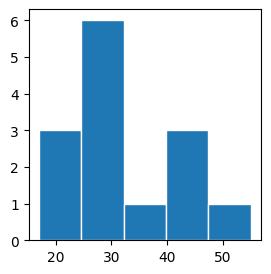

In [34]:
### El siguiente es un ejemplo de data viz donde se establece una variable horas, 
###se ajusta un tamaño de la imagen generada (se movio a 5x5 para ocupar menos espacio)
### Se establecen que los datos se deben obtener en 5 intervalos

hours = [17, 20, 22, 25, 26, 27, 30, 31, 32, 38, 41, 41, 45, 55]

# Initialize layout
fig, ax = plt.subplots(figsize = (3, 3))

#plot
ax.hist(hours, bins=5, edgecolor="white");

De resultado se oberva que los divide en 5 intervalos:
- 17 a 24
- 25 a 32
- 33 a 40
- 41 a 47
- 48 a 55

La mayoria de los datos de las horas se concentran en el intervalo de 25 a 32 hrs

### Ejercicio 1.2

Elabora una gráfica de distribución usando un una variable de Gapminder dataset

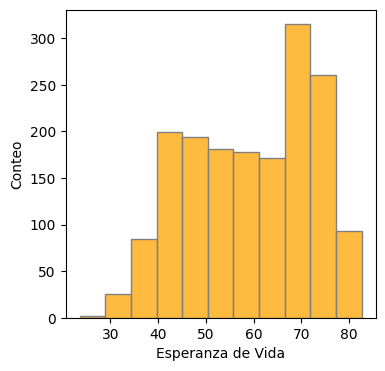

In [64]:
plt.figure(figsize=(4, 4))
sns.histplot(data=dataset, x='cc',  
                      bins=11, edgecolor='grey', color='orange')
plt.xlabel('Esperanza de Vida')
plt.ylabel('Conteo')
plt.show()

Se puede visualizar en la grafica que la esperanza de vida en la mayoria de los paises se encuentra entre 68 y 78 años aproximadamente donde su concentracion esta entre 65 y 72 años, de igual forma se ve que hay valores muy minimos donde la esperanza de vida es menor a 29 años

## Ejercicio 2

### Ejercicio 2.1

Elabora una gráfica de cajas usando un ejemplo de data to viz

<Axes: xlabel='species', ylabel='sepal_length'>

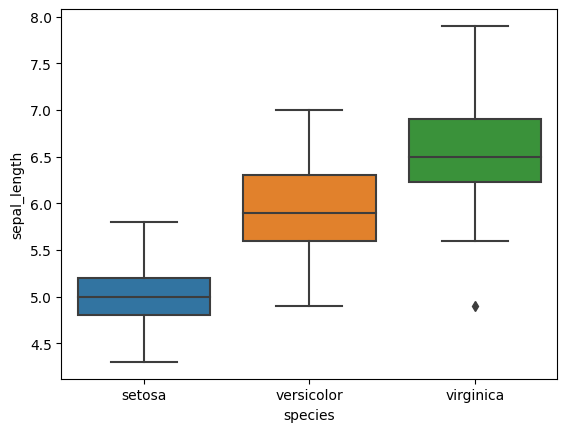

In [65]:
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot( x=df["species"], y=df["sepal_length"] )

La planta virginica tiene una mediana del sepalo mayor a las demàs especies, la setosa es la cual aunque la mediana 
del sepalo es menor tiene una variacion menor de los datos por lo que este valor puede ser constante para esta especie 

### Ejercicio 2.2

Elabora una gráfica de cajas usando un una variable de Gapminder dataset

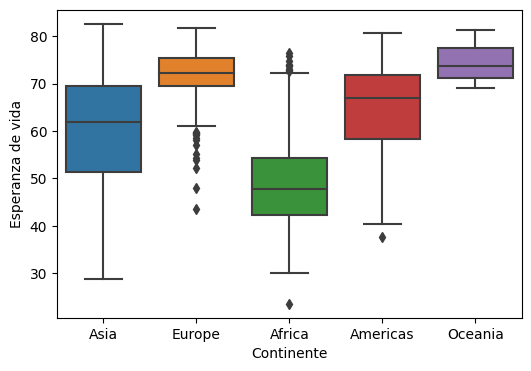

In [84]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=dataset, x='continent', y='lifeExp')
plt.xlabel('Continente')
plt.ylabel('Esperanza de vida')
plt.show()

En la grafica se observa donde se encuentra la mediana de los datos por cada continente,
para Europa se tiene varios valores considerados como atipicos, en africa de igual forma se tienen por arriba 
del rango de los datos.
De igual forma se observa que la mediana de la esperanza de vida de Africa es la menor,mientras que Oceania es la que tiene mediana por encima de los demas continentes (Similar a Europa)con una dispersion pequeña de los datos por lo que sus habitantes mayormente se encuentran dentro de las edades de 70 a 75 años

## Ejercicio 3

### Ejercicio 3.1

Elabora una gráfica de dispersión usando un ejemplo de data to viz

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

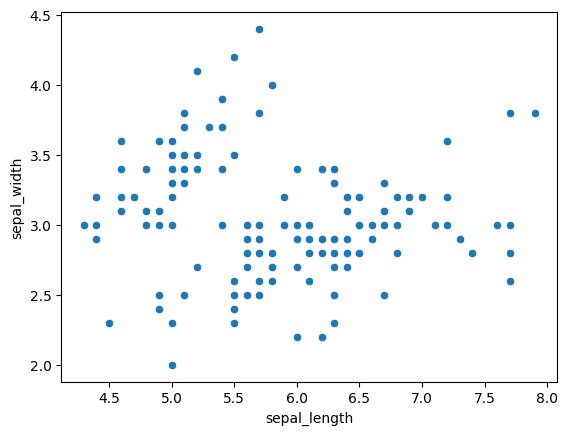

In [85]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# use the function scatterplot() to make a scatterplot
sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"])

### Ejercicio 3.2

Elabora una gráfica de dispersión usando una variable de Gapminder dataset

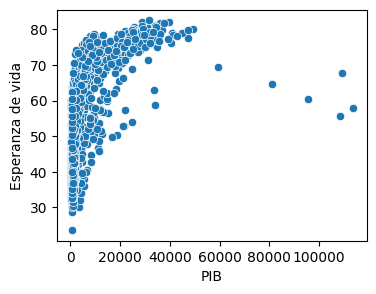

In [95]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=dataset, x='gdpPercap', y='lifeExp')
plt.xlabel('PIB')
plt.ylabel('Esperanza de vida')
plt.show()

De forma general, se observa que se tiene una relacion muy baja entre la esperanza de vida y el PIB, la mayoria de los puntos 
se encuentran en la parte izquiera baja la cual indica que teniendo un PIB bajo la esperanza 
de vida es similar por lo que puede deberse a que hay mas factores que influyen independientes 
a lo economico.
Hay algunos otros valores que si indican un aumento mientras aumenta el PIB sin embargo en punto aprox de 40000 se tiene una estabilidad en los datos
Son pocos los valores (outliers) que se observan tiene una esperanza de vida similar mientras mas aumento tiene su PIB

Como lo anterior se ve de forma general y hay gran variacion en los promedios de esperanza
de vida por pais y tambien el PIB se realiza el detalle por continente

Se observa que para Africa, el PIB es minimo a comparacion de otros continentes y aunque su esperanza es alta es lineal al PIB por lo que este no influye en el aumento de años de vida

Para el caso de Ocenia se observa que si hay una relacion positiva entre el aumento del PIB y su esperanza de vida la cual desde el inicio es alta por lo que en este pais puede suponerse que la economia es un factor importante

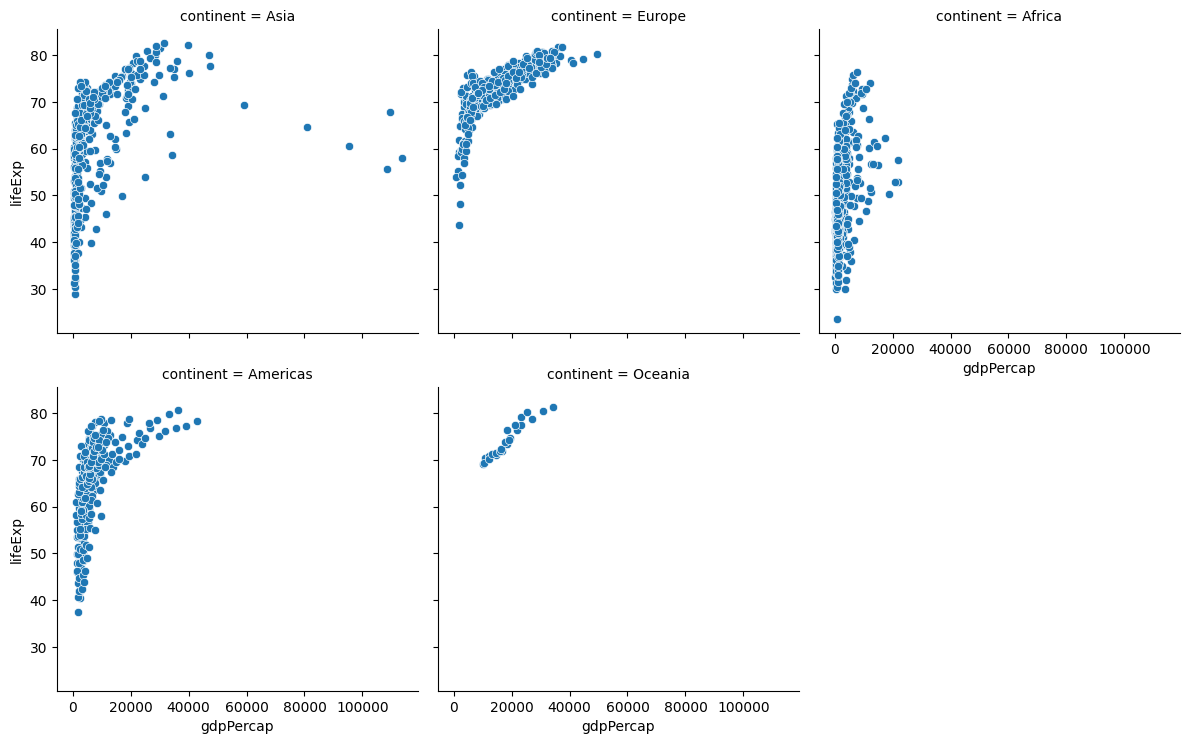

In [94]:
GXC = sns.FacetGrid(dataset, col="continent", col_wrap=3, height=4)
GXC.map(sns.scatterplot, "gdpPercap", "lifeExp")

plt.subplots_adjust(top=0.9)
plt.show()

## Ejercicio 4

### Ejercicio 4.1

Elabora una gráfica de calor usando un ejemplo de data to viz

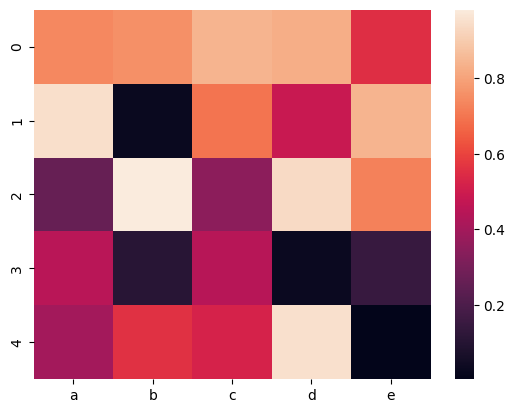

In [97]:
# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])

# Default heatmap
p1 = sns.heatmap(df)

### Ejercicio 4.2

Elabora una gráfica de calor usando un una variable de Gapminder dataset
Nota: Es necesario hacer una operación de agregación

In [133]:
### Se realiza una tabla de contingencia agrupando el promedio de vida por continente y año 
### Se utiliza el año que ha pesar de no ser una variable categorica puede dar mayor 
###visibilidad en los datos ya que las variables de pais generaba datos inconclusos y
###y las otras variables son indicadores 

pivot_table = dataset.pivot_table(index='continent', columns='year', values='lifeExp', aggfunc='mean')

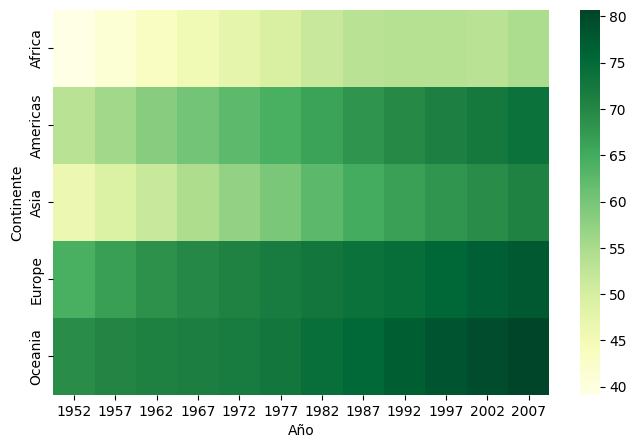

In [131]:
### Se establece el tamaño del grafico y la gama de colores
plt.figure(figsize=(8, 5))
Mapa = sns.heatmap(pivot_table, cmap='YlGn')
plt.xlabel('Año')
plt.ylabel('Continente')
plt.show()

Se observa que en todos los continentes con el pasar de los años el promedio de la esperanza de vida ha aumentado, sin embargo en Africa desde 1952 se tiene un promedio de vida menor a 45 y el maximo que ha alcanzo ha sido menos de 55 años
En el pais de Oceania desde 1952 se tiene un promedio de vida alto y se ha mantenido de esta forma
En Asia se ve significativamente el cambio ya que inicia con un promedio muy baajo y el aumento es significativo en 2007

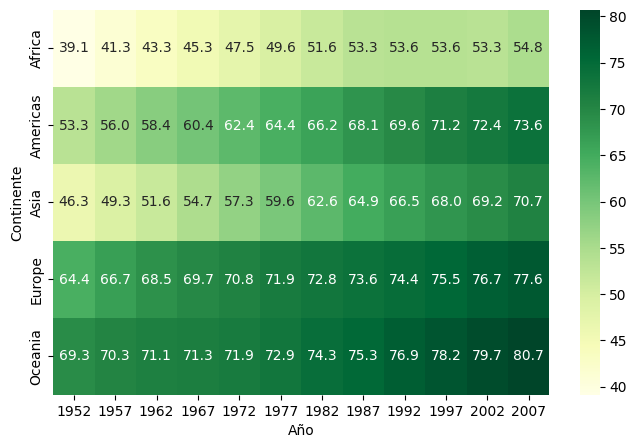

In [135]:
### Para mejorar la visualizacion de lo anterior se agrega informacion del promedio
plt.figure(figsize=(8, 5))
Mapa = sns.heatmap(pivot_table, cmap='YlGn',annot=True, fmt='.1f')
plt.xlabel('Año')
plt.ylabel('Continente')

# Mostrar el mapa de calor
plt.show()

## Ejercicio 5

### Ejercicio 5.1

Elabora una gráfica de barras usando un ejemplo de data to viz

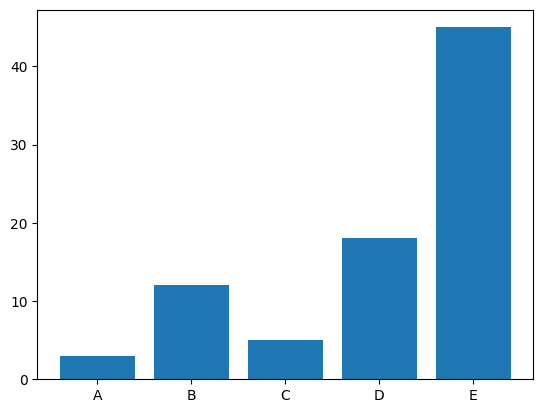

In [136]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

La grafica anterior de ejemplo de data viz muestra el nombre de las barras y los datos que contiene cada una de ellas, siendo la barra E la que tiene el valor mas alto y la barra A el mas bajo

### Ejercicio 5.2

Elabora una gráfica de barras usando un una variable de Gapminder dataset

In [182]:
Medialife=dataset.groupby('continent')['lifeExp'].mean().reset_index()

In [187]:
Medialife=Medialife.round(1)
Medialife=Medialife.sort_values(by='lifeExp', ascending=True)
Medialife

,continent,lifeExp
0,Africa,48.9
2,Asia,60.1
1,Americas,64.7
3,Europe,71.9
4,Oceania,74.3


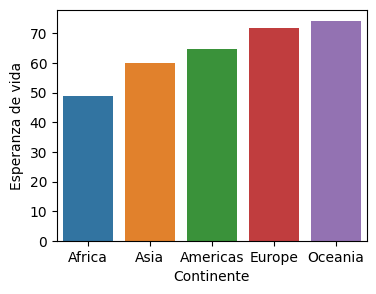

In [188]:
plt.figure(figsize=(4, 3))
sns.barplot(x='continent', y='lifeExp', data=Medialife)
plt.xlabel('Continente')
plt.ylabel('Esperanza de vida')
plt.show()

Se analiza la esperanza de vida por pais obteniendo que la menor es Africa con menor de 50 años promedio y la mayor es oceania aprox con un promedio de 74 años

## Ejercicio 6

### Ejercicio 6.1

Elabora una gráfica de barras apiladas usando un ejemplo de data to viz

In [189]:
data = {
    "Product": ["Product A", "Product A", "Product A", "Product B", "Product B", "Product B"],
    "Segment": ["Segment 1", "Segment 2", "Segment 3", "Segment 1", "Segment 2", "Segment 3"],
    "Amount_sold": [100, 120, 120, 80, 160, 150]
}

df = pd.DataFrame(data)

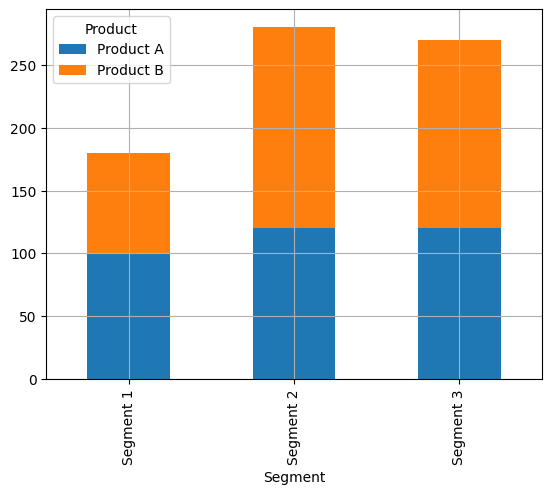

In [193]:
# Pivot the data to have 'Product' as columns and 'Segment' as the index
pivot_df = df.pivot(index='Segment',
                    columns='Product',
                    values='Amount_sold')
# Create a grouped barplot
pivot_df.plot.bar(stacked=True,
                  grid=True)

plt.show()

### Ejercicio 6.2

Elabora una gráfica de barras apiladas usando un una variable de Gapminder dataset

In [232]:
### Se crean el dataset para obtener dos datos, se utiliza los continentes de Africa y Oceania
###y los años de 1997 y 2007 ya que son datos recientes y establecemos un tiempo del 
##cambio en 10 años sobre la esperanza de vida

subset = dataset[(dataset['continent'].isin(['Africa', 'Oceania'])) & (dataset['year'].isin([1997, 2007]))]

In [233]:
subset.head(8)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
33,Algeria,Africa,1997,69.152,29072015,4797.295051,DZA,12
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
45,Angola,Africa,1997,40.963,9875024,2277.140884,AGO,24
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
69,Australia,Oceania,1997,78.830,18565243,26997.936570,AUS,36
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
129,Benin,Africa,1997,54.777,6066080,1232.975292,BEN,204
131,Benin,Africa,2007,56.728,8078314,1441.284873,BEN,204


In [234]:
### Promedio por continente y año

agg_subset = subset.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()

In [235]:
agg_subset.round(1)

,year,continent,lifeExp
0,1997,Africa,53.6
1,1997,Oceania,78.2
2,2007,Africa,54.8
3,2007,Oceania,80.7


In [236]:
pivot_subset = agg_subset.pivot(index='year', columns='continent', values='lifeExp')
pivot_subset.round(1)

continent,Africa,Oceania
year,,
1997,53.6,78.2
2007,54.8,80.7


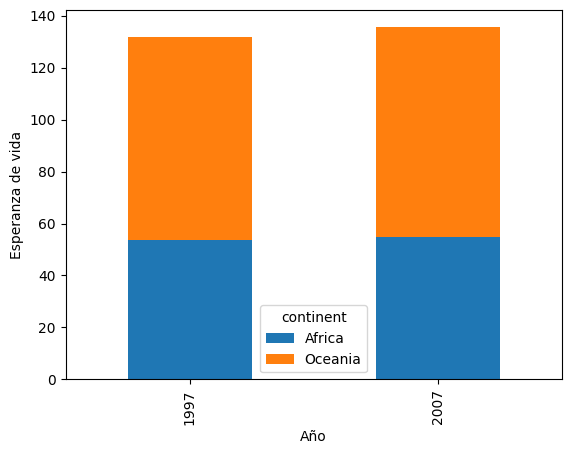

In [237]:
### Creando el grafico apilado
pivot_subset.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.show()

De la grafica anterior se observa que la esperanza de vida ha sido minima para Africa a pesar que ya pasaron 10 años ya que la diferencia es muy ligera, comparado con Oceania esta tiene una mayor esperanza desde 1997 y se observa que en 2007 tuvo igual un incremento el cual es mas notorio que en Africa

## Ejercicio 7

Elabora una gráfica linear y modifica los parametros usando un ejemplo de data to viz

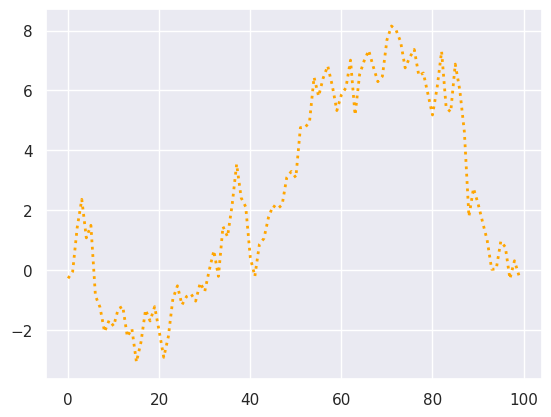

In [265]:
##Los valores del parametro original son con 1000 numeros aleatorios, 
###se reduce a 100 para conservar que los numeros aleatorios sean normales
### Se ajusta el tipo y ancho de linea, color

sns.set_theme()
values=np.cumsum(np.random.randn(100,1))
plt.plot(values, color="orange", linestyle=":",linewidth=2)
plt.show()

A pesar que es aleatorio y puede variar, en este caso se observa que a lo largo del tiempo los numeros generados no siguen una tendencia especifica ya que hay picos donde el valor baja ejemplo en rango 3 a 20 y vuelve a subir hasta llegar a punto maximo en el rango de 60 a 80, al final tiene una caida a partir de 80 hasta 100